Problem - Analyzing the impact of customer membership status on sales performance and purchasing behavior to determine the effectiveness of the membership program,

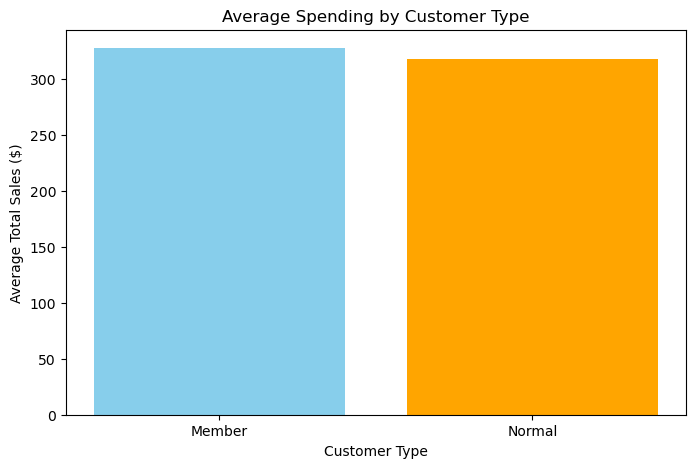

In [3]:
# Calculate average spending by customer type
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (assuming it's in a CSV file)
file_path = r"C:\Users\94718\OneDrive\Desktop\NIBM\Principle of DS\ProtofolioIndi\GitCode1\PRINCIPLES-OF-DATA-SCIENCE-Portfolio\Data Acquisition\Data\supermarket_sales - Sheet1.csv"  # Change this to your actual file path
super_data = pd.read_csv(file_path)

avg_spending = super_data.groupby('Customer type')['Total'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(avg_spending['Customer type'], avg_spending['Total'], color=['skyblue', 'orange'])
plt.title('Average Spending by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Total Sales ($)')
plt.show()

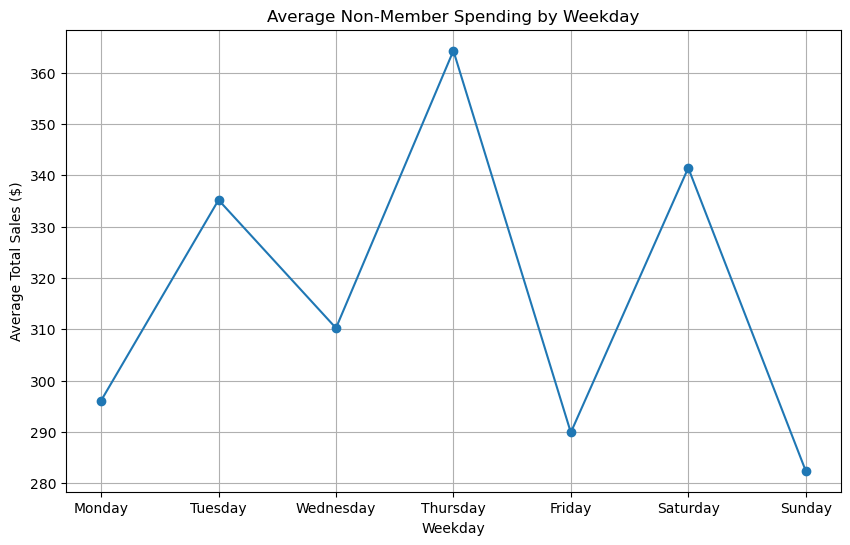

In [11]:
# Compare weekday vs. weekend spending for non-members
super_data['Date'] = pd.to_datetime(super_data['Date'])
super_data['Weekday'] = super_data['Date'].dt.day_name()
non_member_data = super_data[super_data['Customer type'] == 'Normal']

weekday_spending = non_member_data.groupby('Weekday')['Total'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

weekday_spending.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Non-Member Spending by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Total Sales ($)')
plt.grid(True)
plt.show()

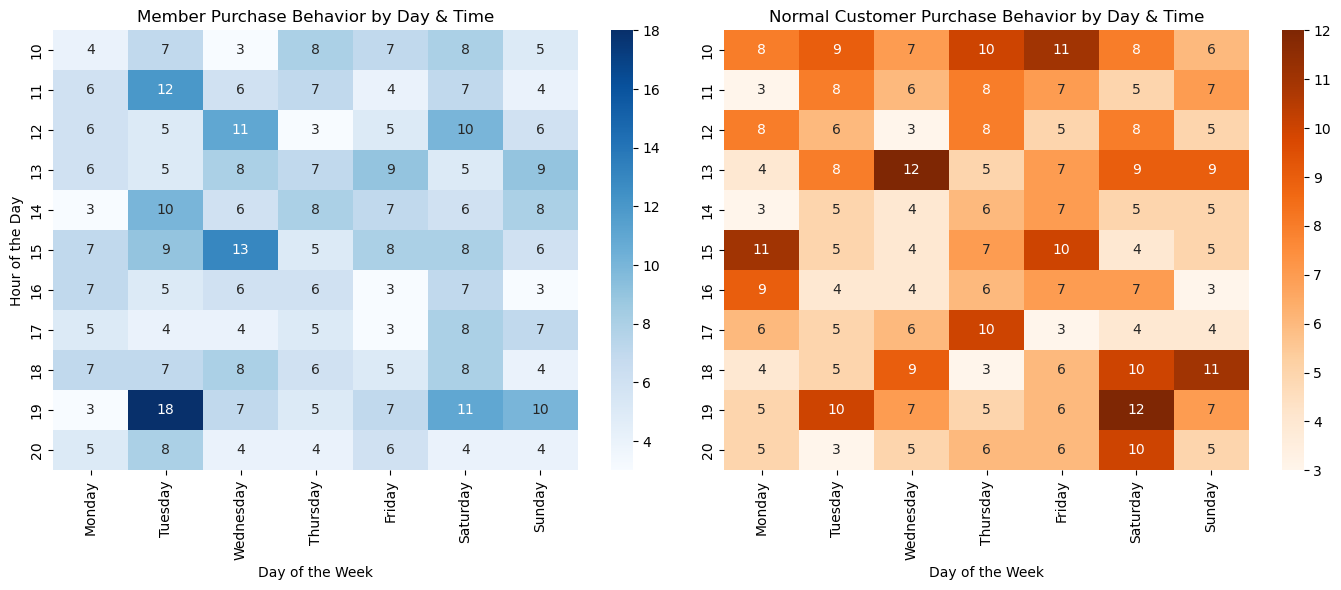

C:\Users\94718\AppData\Local\Temp\ipykernel_17500\3113574341.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=super_data, x='Time', y='Total', hue='Customer type', estimator='sum', ci=None)


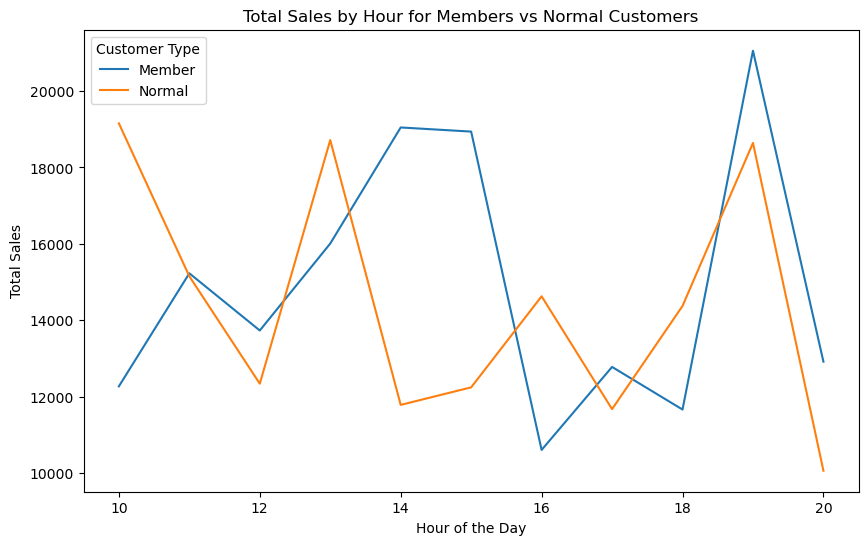

In [16]:

import seaborn as sns

# Convert Date and Time columns to datetime format
super_data['Date'] = pd.to_datetime(super_data['Date'])
super_data['Time'] = pd.to_datetime(super_data['Time'], format='%H:%M').dt.hour  # Extracting only hours

# Extract day of the week
super_data['DayOfWeek'] = super_data['Date'].dt.day_name()

# Group by Customer Type, Day, and Time to count transactions
purchase_behavior = super_data.groupby(['Customer type', 'DayOfWeek', 'Time']).size().reset_index(name='Count')

# Create a pivot table for heatmap visualization
pivot_member = purchase_behavior[purchase_behavior['Customer type'] == 'Member'].pivot(index='Time', columns='DayOfWeek', values='Count')
pivot_normal = purchase_behavior[purchase_behavior['Customer type'] == 'Normal'].pivot(index='Time', columns='DayOfWeek', values='Count')

# Define the order of days for sorting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_member = pivot_member.reindex(columns=day_order)
pivot_normal = pivot_normal.reindex(columns=day_order)

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(pivot_member, cmap='Blues', ax=axes[0], annot=True, fmt='.0f')
sns.heatmap(pivot_normal, cmap='Oranges', ax=axes[1], annot=True, fmt='.0f')

axes[0].set_title("Member Purchase Behavior by Day & Time")
axes[1].set_title("Normal Customer Purchase Behavior by Day & Time")
axes[0].set_ylabel("Hour of the Day")
axes[1].set_ylabel("")
axes[0].set_xlabel("Day of the Week")
axes[1].set_xlabel("Day of the Week")

plt.tight_layout()
plt.show()

# Line plot to show sales trends for members vs. normal customers over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=super_data, x='Time', y='Total', hue='Customer type', estimator='sum', ci=None)
plt.title('Total Sales by Hour for Members vs Normal Customers')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.legend(title="Customer Type")
plt.show()


<Figure size 1000x600 with 0 Axes>

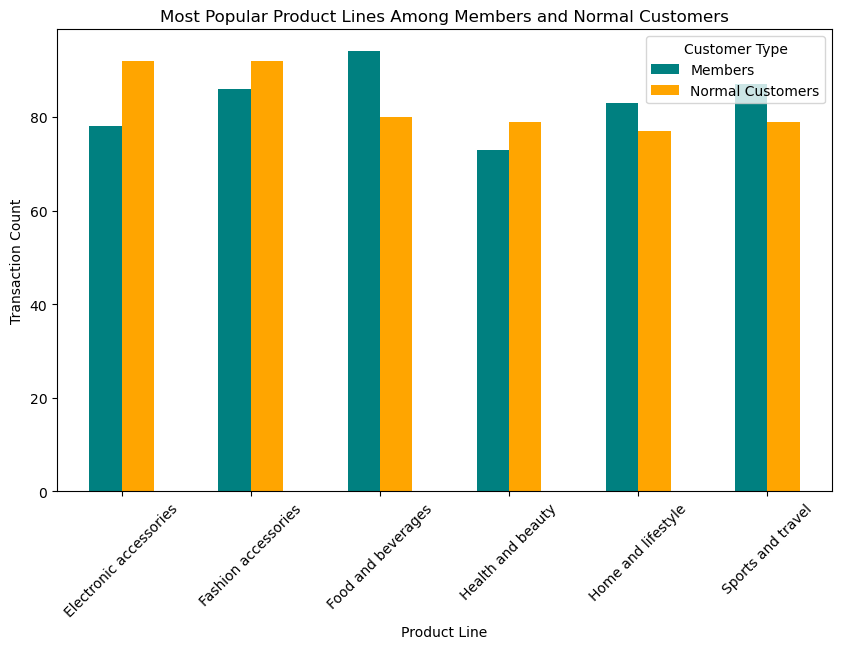

In [15]:

# Identify top product lines for Members and Normal Customers
member_data = super_data[super_data['Customer type'] == 'Member']
normal_data = super_data[super_data['Customer type'] == 'Normal']

member_counts = member_data['Product line'].value_counts()
normal_counts = normal_data['Product line'].value_counts()

# Combine both counts into a DataFrame for comparison
product_counts_df = pd.DataFrame({'Members': member_counts, 'Normal Customers': normal_counts}).fillna(0)

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
product_counts_df.plot(kind='bar', figsize=(10, 6), color=['teal', 'orange'])

plt.title('Most Popular Product Lines Among Members and Normal Customers')
plt.xlabel('Product Line')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.show()


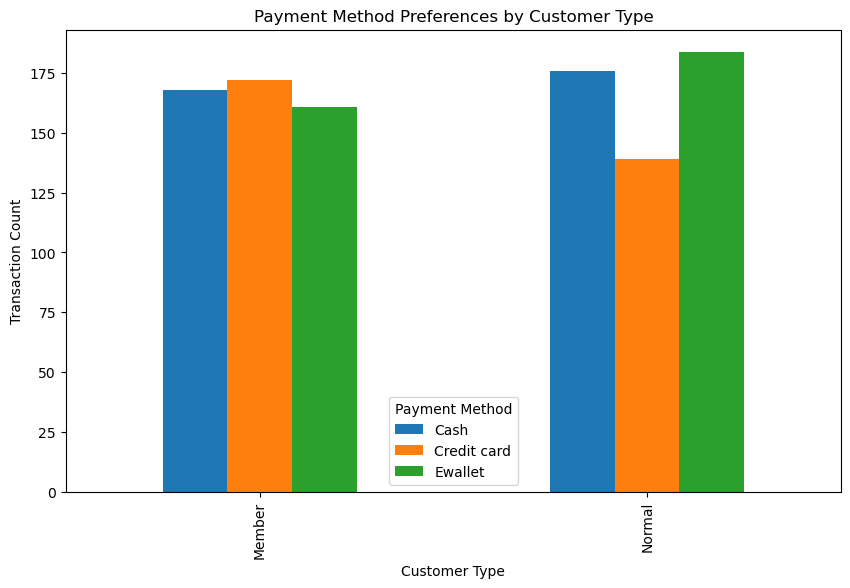

In [8]:
# Group by 'Customer type' and 'Payment', then count occurrences
payment_counts = super_data.groupby(['Customer type', 'Payment']).size().unstack()

# Plot as a grouped bar chart
payment_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels and title
plt.title('Payment Method Preferences by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Transaction Count')
plt.legend(title='Payment Method')

# Show the plot
plt.show()


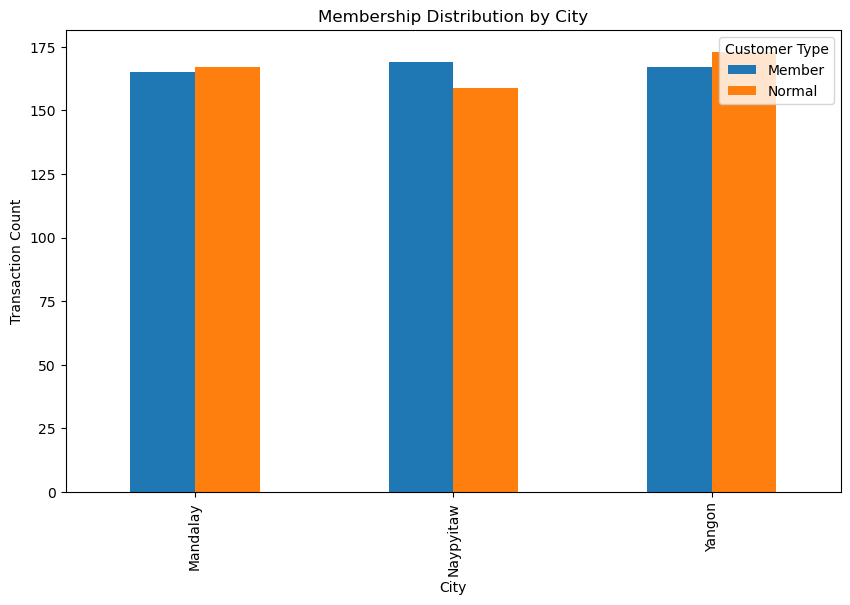

In [9]:
# Analyze membership distribution by city
city_members = super_data.groupby(['City', 'Customer type']).size().unstack()

city_members.plot(kind='bar', figsize=(10, 6))
plt.title('Membership Distribution by City')
plt.xlabel('City')
plt.ylabel('Transaction Count')
plt.legend(title='Customer Type')
plt.show()

<Figure size 1400x800 with 0 Axes>

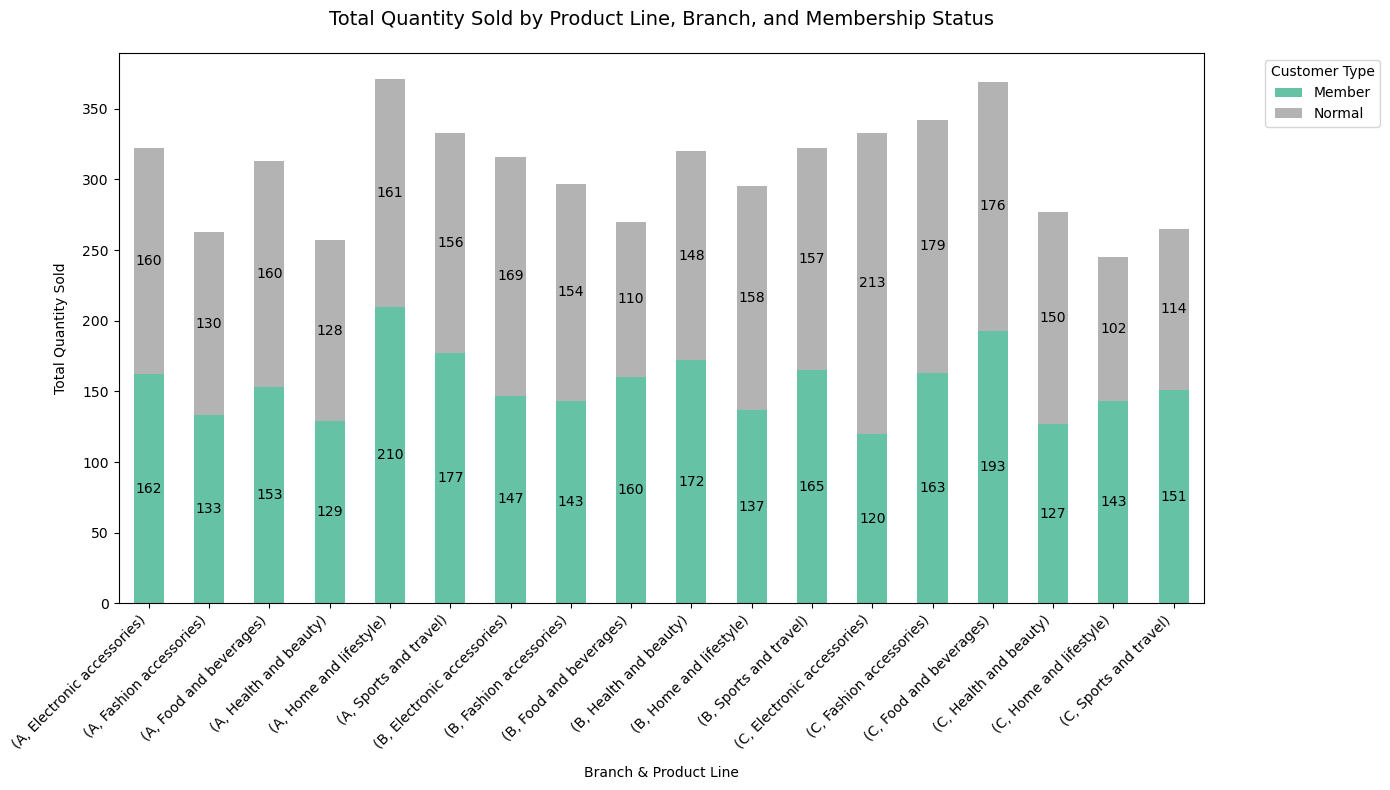

In [14]:
# Group data by Branch, Product line, and Customer type
stacked_data = super_data.groupby(['Branch', 'Product line', 'Customer type'])['Quantity'].sum().unstack().reset_index()

# Create stacked bar chart
plt.figure(figsize=(14, 8))

# Plot settings
ax = stacked_data.set_index(['Branch', 'Product line']).plot(
    kind='bar', 
    stacked=True,
    colormap='Set2',
    figsize=(14, 8)
)

plt.title('Total Quantity Sold by Product Line, Branch, and Membership Status', pad=20, fontsize=14)
plt.xlabel('Branch & Product Line', labelpad=10)
plt.ylabel('Total Quantity Sold', labelpad=10)
plt.xticks(rotation=45, ha='right')

# Add annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                   (p.get_x() + width/2, p.get_y() + height/2),
                   ha='center', va='center')

plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()